<a href="https://githubtocolab.com/Sher016/IA/blob/main/01%20-%20exploración.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>

In [2]:
import zipfile 
import pandas as pd

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle competitions download -c udea-ai4eng-20242

In [ ]:
!unzip udea-ai4eng-20242.zip

In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


Preprocesado de los datos de entrenamiento

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn as sk
from sklearn import preprocessing as ps
from difflib import SequenceMatcher

In [5]:
#Carga de los datos de entrenamiento
#with zipfile.ZipFile("udea-ai4eng-20242.zip", 'r') as zip_ref:
    #zip_ref.extractall("data") 

df = pd.read_csv("data/train.csv")
df.head() 


,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,medio-alto
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,alto
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,No,medio-bajo


Ahora, lo primero que vamos a hacer es eliminar la columna correspondiente a el programa academico que estudió cada estudiante, esto es debido a que esa columna tiene todos los programas academicos, y tiene muchos valores únicos(948) diferentes que podrian generar confusión al modelo o ruido, lo que se buscaria hacer seria mejor filtrarlo por facultades, o departamentos para reducir este número de clases por así decirlo y poder entrenar mejor el modelo. Este procedimiento podria hacerse atraves de una LLM de clasificacion, o por ejemplo pasar esos valores a una tabla y clasificarlos. De forma parecida se eliminará también la columna id.

In [6]:
columnas = [
    "ID", 
    "PERIODO", 
    "ESTU_PRGM_ACADEMICO", 
    "ESTU_PRGM_DEPARTAMENTO", 
    "ESTU_VALORMATRICULAUNIVERSIDAD", 
    "ESTU_HORASSEMANATRABAJA", 
    "FAMI_ESTRATOVIVIENDA", 
    "FAMI_TIENEINTERNET", 
    "FAMI_EDUCACIONPADRE", 
    "FAMI_EDUCACIONMADRE"
]

# Número de clases para estas columnas
df[columnas].nunique()

ID                                692500
PERIODO                                9
ESTU_PRGM_ACADEMICO                  948
ESTU_PRGM_DEPARTAMENTO                31
ESTU_VALORMATRICULAUNIVERSIDAD         8
ESTU_HORASSEMANATRABAJA                5
FAMI_ESTRATOVIVIENDA                   7
FAMI_TIENEINTERNET                     2
FAMI_EDUCACIONPADRE                   12
FAMI_EDUCACIONMADRE                   12
dtype: int64

In [7]:
df2 = df.copy()

In [8]:
print(df2.columns)
print(df.columns)

Index(['ID', 'PERIODO', 'ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO',
       'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA',
       'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_EDUCACIONPADRE',
       'FAMI_EDUCACIONMADRE', 'ESTU_PAGOMATRICULAPROPIO',
       'RENDIMIENTO_GLOBAL'],
      dtype='object')
Index(['ID', 'PERIODO', 'ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO',
       'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA',
       'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_EDUCACIONPADRE',
       'FAMI_EDUCACIONMADRE', 'ESTU_PAGOMATRICULAPROPIO',
       'RENDIMIENTO_GLOBAL'],
      dtype='object')


Luego, se realizará la parte del encoding, esto debido a que se tienen muchas columnas con valores categoricos, que puedan ser entendido y procesado de mejor forma por los algoritmos de machine learning. Los algoritmos trabajan mejor con datos numéricos.

In [9]:

from sklearn.preprocessing import LabelEncoder
df2.drop(["ID", "ESTU_PRGM_ACADEMICO"], axis=1, inplace=True, errors='ignore')
le = LabelEncoder()
for column in df2.columns:
    if df2[column].dtype == 'object':
        df2[column] = le.fit_transform(df2[column])

df2.head()

,PERIODO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,20212,4,3,3,2,1,11,5,0,2
1,20212,3,1,0,2,0,10,11,0,1
2,20203,4,1,4,2,1,8,8,0,1
3,20195,26,2,0,3,1,4,8,0,0
4,20212,1,1,2,2,1,6,6,0,3


Luego de haber hecho el encoding, y habiendo revisado anteriormente los valores nulos y faltantes que hay, se realiza una agrupacion de los datos de las columnas con respecto al target para posteriormente reemplazarlos, por ejemplo podria con la media o el promedio, esto se puede decidir revisando la distribución de dichos datos con respecto al target. 

In [10]:
df2.groupby("RENDIMIENTO_GLOBAL").mean()

,PERIODO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO
RENDIMIENTO_GLOBAL,,,,,,,,,
0,20198.050319,8.982274,3.477340,2.155951,2.219999,0.985770,5.743063,6.033094,0.312489
1,20199.441548,10.060305,1.853775,2.630284,1.581310,0.881297,6.688242,7.054507,0.566170
2,20198.083621,9.702591,2.451034,2.514145,1.801968,0.949638,6.495720,6.891469,0.440819
3,20197.891847,9.875443,1.982696,2.608637,1.625662,0.912628,6.666493,7.058006,0.512698


In [11]:

dfmoda = df2.groupby("RENDIMIENTO_GLOBAL").agg(lambda x: x.mode()[0])
dfmoda = dfmoda.reset_index()
dfmoda


,RENDIMIENTO_GLOBAL,PERIODO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO
0,0,20203,4,6,4,2,1,0,0,0
1,1,20212,4,0,4,1,1,7,7,1
2,2,20195,4,0,4,1,1,8,8,0
3,3,20195,4,0,4,1,1,7,8,1


En éste caso, se escoge la moda ya que para datos categoricos se considera más representativo ver cual se repite.

In [12]:
for column in df2.columns:
    print(f"In column {column}")
    df2[column] = df2.apply(
        lambda row: dfmoda.at[row["RENDIMIENTO_GLOBAL"], column] if pd.isnull(row[column]) else row[column],
        axis=1
    )
  


In column PERIODO
In column ESTU_PRGM_DEPARTAMENTO
In column ESTU_VALORMATRICULAUNIVERSIDAD
In column ESTU_HORASSEMANATRABAJA
In column FAMI_ESTRATOVIVIENDA
In column FAMI_TIENEINTERNET
In column FAMI_EDUCACIONPADRE
In column FAMI_EDUCACIONMADRE
In column ESTU_PAGOMATRICULAPROPIO
In column RENDIMIENTO_GLOBAL


Ahora, se realiza un conteo para observar número de valores nulos en cada columna del DataFrame.

In [13]:
df2.isna().sum()

PERIODO                           0
ESTU_PRGM_DEPARTAMENTO            0
ESTU_VALORMATRICULAUNIVERSIDAD    0
ESTU_HORASSEMANATRABAJA           0
FAMI_ESTRATOVIVIENDA              0
FAMI_TIENEINTERNET                0
FAMI_EDUCACIONPADRE               0
FAMI_EDUCACIONMADRE               0
ESTU_PAGOMATRICULAPROPIO          0
RENDIMIENTO_GLOBAL                0
dtype: int64

No hay valores nulos para ninguna columna, esto quiere decir que se tiene en dataset listo para seguir realizandole operaciones. Ahora, se realizará una matriz de correlacion, eso debido a que se tienen datos numericos y los cálculos necesarios para esta son solo válidos para variables que tienen valores numéricos.
La matriz de correlación permite identificar si existe una relación lineal entre las variables numéricas. Esto es útil para entender cómo los diferentes factores pueden influir en el evento objetivo. Siendo entonces la correlacion más alta 1 o -1, y la mas alejada, es decir, una correlación baja cuando el coeficiente de correlación está cerca de 0.

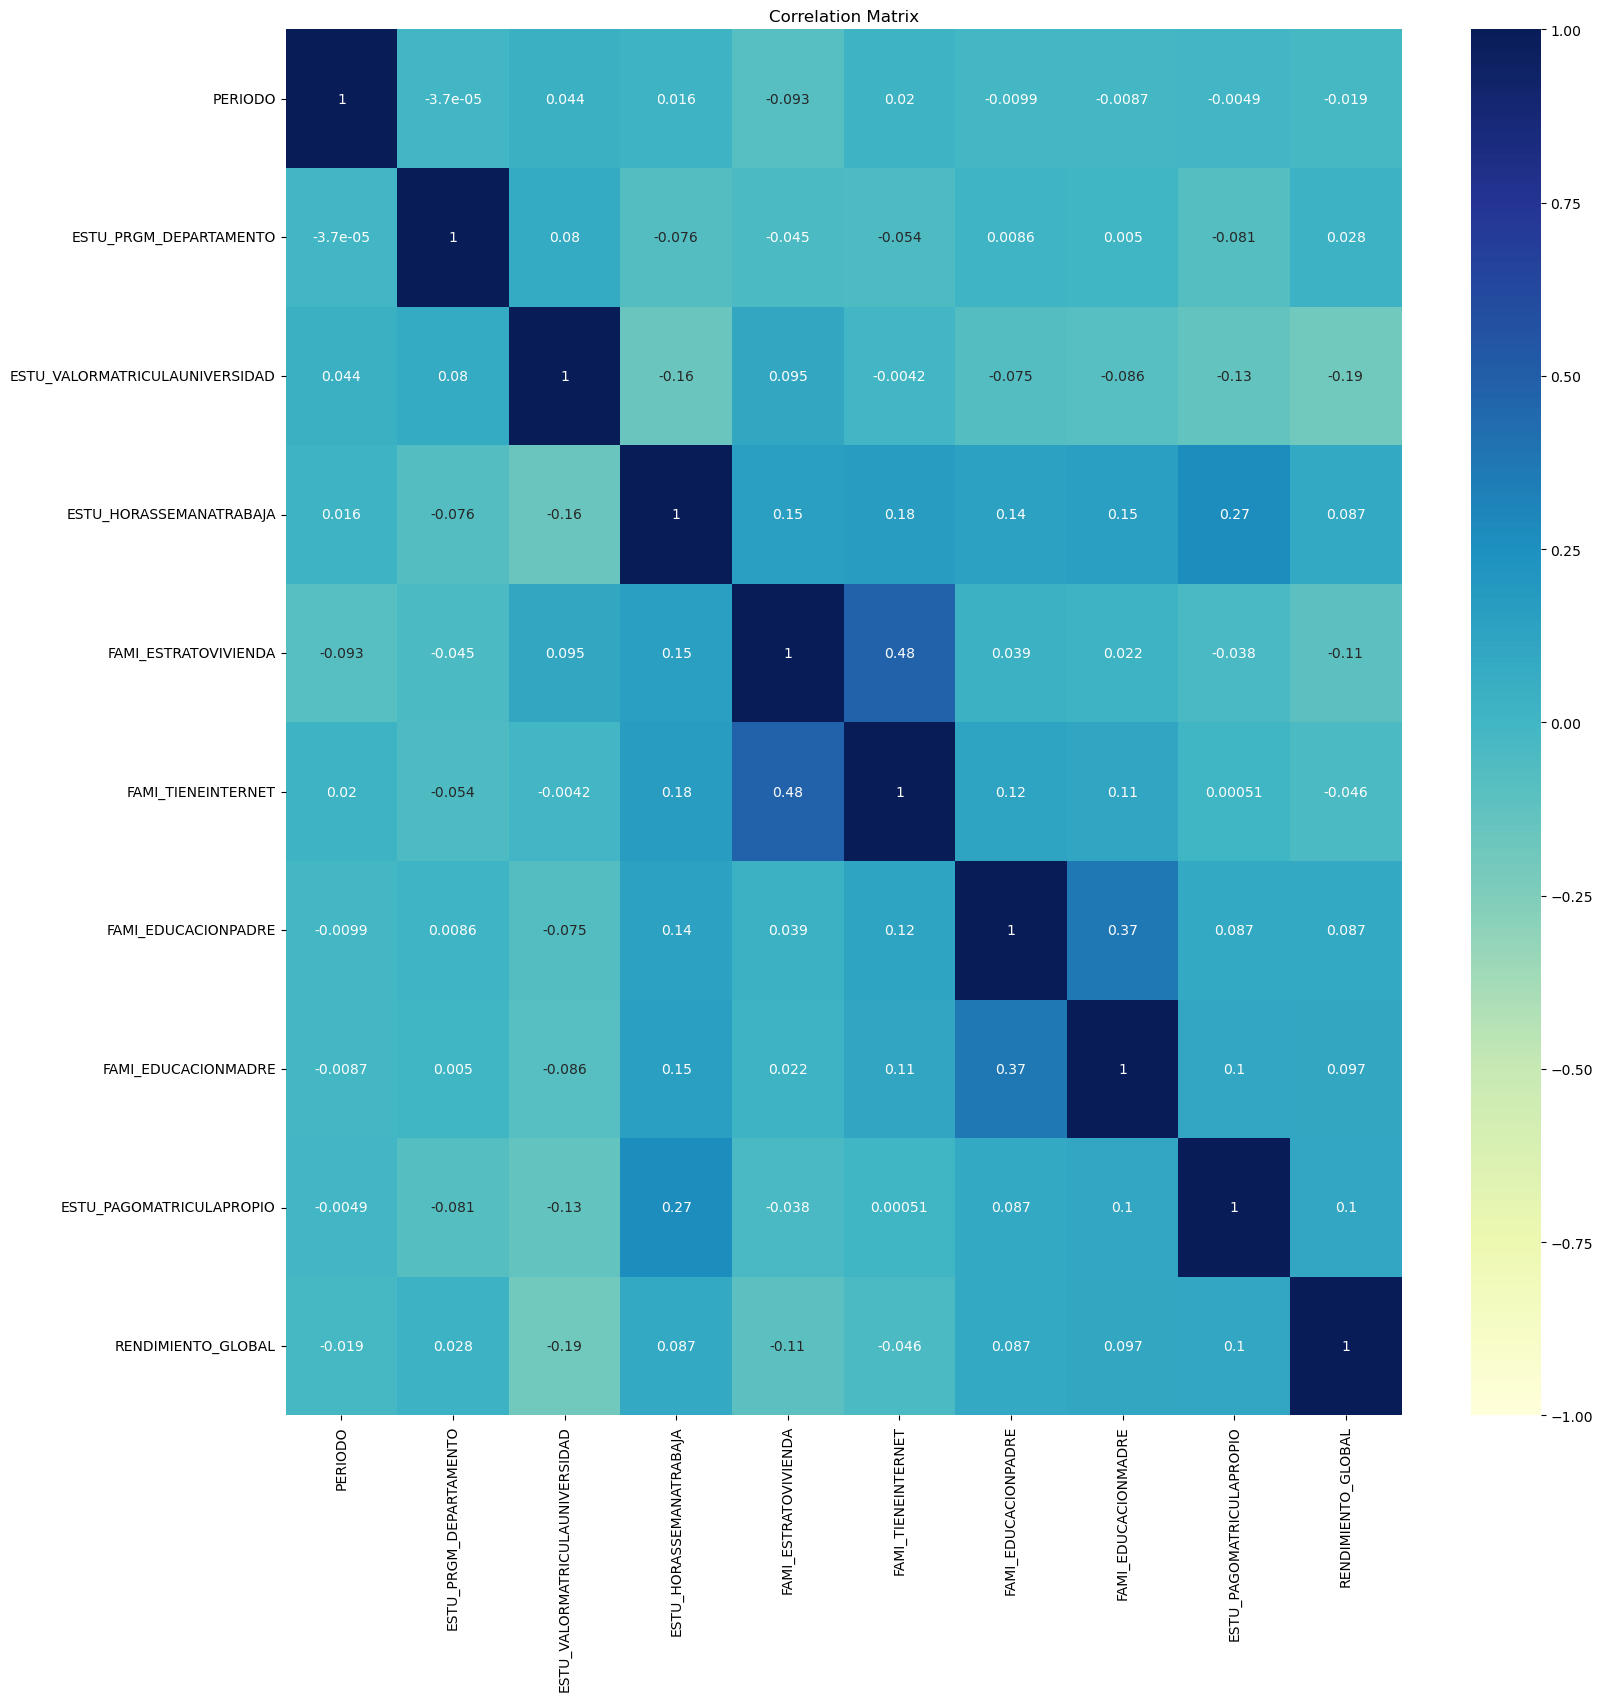

In [14]:
corr_matrix = df2.corr()
plt.figure(figsize=(18,18))
sns.heatmap(corr_matrix, annot = True, vmin = -1, vmax = 1, cmap = "YlGnBu").set_title('Correlation Matrix')
plt.show()

In [15]:
target_corr = corr_matrix["RENDIMIENTO_GLOBAL"].drop("RENDIMIENTO_GLOBAL").sort_values(ascending=False)
top_n = 10 
high_corr = target_corr.head(top_n)
low_corr = target_corr.tail(top_n)
high_low_corr = pd.DataFrame({
    'Correlation': high_corr.append(low_corr)
})
print(high_low_corr)

                                Correlation
ESTU_PAGOMATRICULAPROPIO           0.103880
FAMI_EDUCACIONMADRE                0.096974
ESTU_HORASSEMANATRABAJA            0.087071
FAMI_EDUCACIONPADRE                0.086516
ESTU_PRGM_DEPARTAMENTO             0.028170
PERIODO                           -0.019166
FAMI_TIENEINTERNET                -0.045744
FAMI_ESTRATOVIVIENDA              -0.109657
ESTU_VALORMATRICULAUNIVERSIDAD    -0.189888
ESTU_PAGOMATRICULAPROPIO           0.103880
FAMI_EDUCACIONMADRE                0.096974
ESTU_HORASSEMANATRABAJA            0.087071
FAMI_EDUCACIONPADRE                0.086516
ESTU_PRGM_DEPARTAMENTO             0.028170
PERIODO                           -0.019166
FAMI_TIENEINTERNET                -0.045744
FAMI_ESTRATOVIVIENDA              -0.109657
ESTU_VALORMATRICULAUNIVERSIDAD    -0.189888


C:\Users\Sherlyn\AppData\Local\Temp\ipykernel_21396\708979395.py:6: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  'Correlation': high_corr.append(low_corr)


Finalmente se observa que la variable que obtuvo menor correlacion con respecto al target fue el periodo, mientras que la variable que mejor correlacion arojó fue el valor de  la matricula de la universidad. Esto es coherente ya que podria ser que al tener acceso a una educación más cara, se tienen mejores condiciones financieras, mejores condiciones financieras que se traducen en mejores condiciones para estudiar de forma comoda o solo dedicarse a estudiar, por ejemplo.

Finalmente,se guardan los datos preprocesados para utilizarlos luegos en el entranmiento.


In [ ]:
df2.to_csv("preprocesados2.csv", index=False)


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve,train_test_split,cross_validate, ShuffleSplit,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,average_precision_score,mean_absolute_error,r2_score,confusion_matrix,classification_report
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.svm import LinearSVC
import textwrap
from sklearn.decomposition import NMF,PCA
from itertools import product

In [17]:
#Función para reportar el error del modelo
def report_cv_score(z):
    
    #RMSE en prueba y entrenamiento
    lr_ts_score = z['test_score']*(-1)
    lr_tr_score = z['train_score']*(-1)
    lin_rmse_ts = np.sqrt(lr_ts_score)
    lin_rmse_tr = np.sqrt(lr_tr_score)
    print("RMSLE Test: ", "{:.5f}".format(np.mean(lin_rmse_ts)), "(±", "{:.8f}".format(np.std(lin_rmse_ts)),")")
    print("RMSLE Train: ", "{:.5f}".format(np.mean(lin_rmse_tr)), "(±", "{:.8f}".format(np.std(lin_rmse_tr)),")")

In [ ]:
#Función para calcular el RMSLE de los modelos implementados
def RMSLE(y_actual, y_pred):
    
    return np.sqrt(mean_squared_error(y_actual, y_pred))

In [21]:
train = df2

X = train.drop(['RENDIMIENTO_GLOBAL'],axis = 1)
y = train['RENDIMIENTO_GLOBAL'].values

In [29]:
#--------Partición de los datos------------

test_size = 0.3
val_size  = test_size/(1-test_size) # Elementos de validación

print (X.shape, y.shape)
print ("test size %.2f"%test_size)
print ("val size is %.2f (relative to %.2f) "%(val_size, 1-test_size))

#Xtv, ytv son los datos que se usan para entrenar el modelo
#Xts, yts son los datos que se usan para probar el modelo (solo se usan para el testeo final de los modelos que se seleccionen)
Xtv, Xts, ytv, yts = train_test_split(X, y, test_size=test_size)
print (Xtv.shape, Xts.shape)

(692500, 9) (692500,)
test size 0.30
val size is 0.43 (relative to 0.70) 
(484750, 9) (207750, 9)


Metodo supervisado

In [31]:
Modelo1 = DecisionTreeRegressor(max_depth=5)

In [30]:

def train_test_evaluate(model_name, model, X_train, y_train, X_test, y_test):
    # Entrenar el modelo con los datos de entrenamiento
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    
    # Calcular razones en relación al promedio del valor real
    y_test_mean = y_test.mean()
    mae_ratio = mae / y_test_mean
    rmse_ratio = rmse / y_test_mean
    result_df = pd.DataFrame(
        data=[[model_name, mae, mse, rmse, r2, mae_ratio, rmse_ratio]],
        columns=["Model", 'MAE', 'MSE', 'RMSE', 'R2 Score', "MAE Ratio", "RMSE Ratio"]
    )
    return result_df

Obtenemos las metricas para el arbol de desición

In [34]:
train_test_evaluate("DecisionTree",Modelo1,Xtv,ytv,Xts,yts)

,Model,MAE,MSE,RMSE,R2 Score,MAE Ratio,RMSE Ratio
0,DecisionTree,0.954893,1.155358,1.074876,0.077087,0.639767,0.720154


In [40]:
from sklearn.model_selection import cross_val_score
import numpy as np

scores = cross_val_score(Modelo1, X, y, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)

print(f"Promedio RMSE: {rmse_scores.mean()}")

Promedio RMSE: 1.0766066457364174


PCA+DESICIÓNTREE

Se mejoran los hiperparametros para el arbol de desición

In [46]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.metrics import mean_squared_error

parametros_destree = {'max_depth': [2, 5, 8, 12, 15, 20, 30, 40, 50]}
    
decision_tree = GridSearchCV(
        estimator=Modelo1,
        param_grid=parametros_destree,
        cv=ShuffleSplit(n_splits=5, test_size=val_size),
        scoring='neg_mean_squared_error',
        verbose=1,
        n_jobs=-1
    )
    
decision_tree.fit(Xtv, ytv)
    
print("Mejores parámetros para Decision Tree:", decision_tree.best_params_)    
best_tree = DecisionTreeRegressor(max_depth=decision_tree.best_params_["max_depth"])
best_tree.fit(Xtv, ytv)
df1 = train_test_evaluate("Mejor Decision Tree", best_tree, Xtv, ytv, Xts, yts)
df1

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Mejores parámetros para Decision Tree: {'max_depth': 8}


,Model,MAE,MSE,RMSE,R2 Score,MAE Ratio,RMSE Ratio
0,Mejor Decision Tree,0.94509,1.140558,1.067969,0.08891,0.633199,0.715527


In [53]:
components = [1,3,5,7,9]
test_size = 0.3
val_size  = test_size/(1-test_size)
perf_pca_des = [] 
best_tree = DecisionTreeRegressor(max_depth=decision_tree.best_params_["max_depth"])
for i in components:
    pca = PCA(n_components = i)
    X_t = pca.fit_transform(X)
    Xtv, Xts, ytv, yts = train_test_split(X_t, y, test_size=test_size)
    print (Xtv.shape, Xts.shape)
    best_tree.fit(Xtv, ytv)
    perf_pca_des.append(mean_squared_error(yts , best_tree.predict(Xts),squared=False))
print('Mejor RMSE: ',"{:.5f}".format(np.min(perf_pca_des)),
        '  ; obtenido con ',components[np.argmin(perf_pca_des)],' componentes para PCA')
pca = PCA(n_components = components[np.argmin(perf_pca_des)])
X_t1 = pca.fit_transform(X)
Xtv, Xts, ytv, yts = train_test_split(X_t1, y, test_size=test_size)
print (Xtv.shape, Xts.shape)
decission_tree_pca = GridSearchCV(estimator = Modelo1,
                        param_grid = parametros_destree,
                        cv = ShuffleSplit(n_splits= 5, test_size=val_size), 
                        scoring = 'neg_mean_squared_error',
                        verbose = 2,
                        n_jobs = -1)
decission_tree_pca.fit(Xtv, ytv)
Des_tree = DecisionTreeRegressor(max_depth=decission_tree_pca.best_params_["max_depth"])
Des_tree.fit(Xtv,ytv)
df2=train_test_evaluate("Mejor Decision Tree+PCA", Des_tree, Xtv, ytv, Xts, yts)
result_df=pd.concat([df2,df1],ignore_index=True)

(484750, 1) (207750, 1)
(484750, 3) (207750, 3)
(484750, 5) (207750, 5)
(484750, 7) (207750, 7)
(484750, 9) (207750, 9)
Mejor RMSE:  1.07337   ; obtenido con  5  componentes para PCA
(484750, 5) (207750, 5)
Fitting 5 folds for each of 9 candidates, totalling 45 fits


In [56]:

scores_tree = cross_val_score(Modelo1, X, y, cv=5, scoring='neg_mean_squared_error')
rmse_scores_tree = np.sqrt(-scores_tree)

scores_pca_tree = cross_val_score(best_tree, X_t1, y, cv=5, scoring='neg_mean_squared_error')
rmse_scores_pca_tree = np.sqrt(-scores_pca_tree)


print(f"RMSE Árbol de Decisión: {rmse_scores_tree.mean()}")
print(f"RMSE PCA + Árbol de Decisión: {rmse_scores_pca_tree.mean()}")

RMSE Árbol de Decisión: 1.0766066457364174
RMSE PCA + Árbol de Decisión: 1.0740792435391697


Curvas de aprendizaje

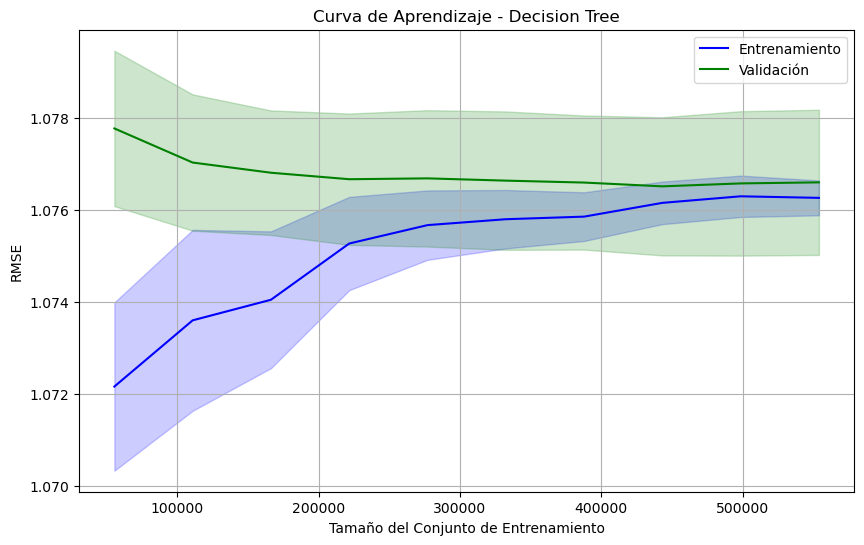

In [58]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Curva de aprendizaje para el modelo DecisionTree sin PCA
train_sizes, train_scores, test_scores = learning_curve(
    Modelo1, X, y, cv=5, scoring='neg_mean_squared_error', 
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

# Calcular el RMSE
train_rmse = np.sqrt(-train_scores)
test_rmse = np.sqrt(-test_scores)

# Graficar la curva de aprendizaje
plt.figure(figsize=(10,6))
plt.plot(train_sizes, train_rmse.mean(axis=1), label="Entrenamiento", color='blue')
plt.plot(train_sizes, test_rmse.mean(axis=1), label="Validación", color='green')
plt.fill_between(train_sizes, train_rmse.mean(axis=1) - train_rmse.std(axis=1), 
                 train_rmse.mean(axis=1) + train_rmse.std(axis=1), alpha=0.2, color='blue')
plt.fill_between(train_sizes, test_rmse.mean(axis=1) - test_rmse.std(axis=1), 
                 test_rmse.mean(axis=1) + test_rmse.std(axis=1), alpha=0.2, color='green')

plt.title('Curva de Aprendizaje - Decision Tree')
plt.xlabel('Tamaño del Conjunto de Entrenamiento')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True)
plt.show()

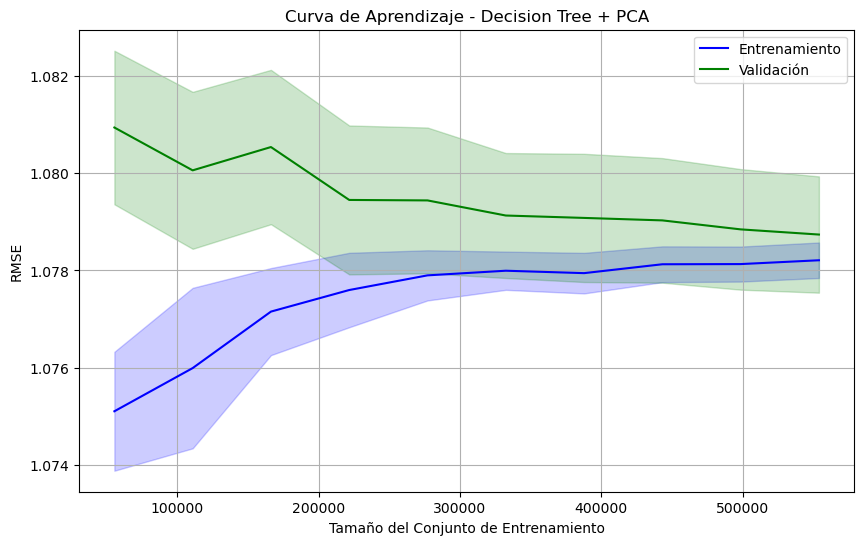

In [59]:
# Curva de aprendizaje para el modelo DecisionTree con PCA
best_n_components = components[np.argmin(perf_pca_des)]  # El número de componentes de PCA óptimo
pca = PCA(n_components=best_n_components)
X_pca = pca.fit_transform(X)

train_sizes, train_scores, test_scores = learning_curve(
    Modelo1, X_pca, y, cv=5, scoring='neg_mean_squared_error', 
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

#  RMSE
train_rmse_pca = np.sqrt(-train_scores)
test_rmse_pca = np.sqrt(-test_scores)

plt.figure(figsize=(10,6))
plt.plot(train_sizes, train_rmse_pca.mean(axis=1), label="Entrenamiento", color='blue')
plt.plot(train_sizes, test_rmse_pca.mean(axis=1), label="Validación", color='green')
plt.fill_between(train_sizes, train_rmse_pca.mean(axis=1) - train_rmse_pca.std(axis=1), 
                 train_rmse_pca.mean(axis=1) + train_rmse_pca.std(axis=1), alpha=0.2, color='blue')
plt.fill_between(train_sizes, test_rmse_pca.mean(axis=1) - test_rmse_pca.std(axis=1), 
                 test_rmse_pca.mean(axis=1) + test_rmse_pca.std(axis=1), alpha=0.2, color='green')

plt.title('Curva de Aprendizaje - Decision Tree + PCA')
plt.xlabel('Tamaño del Conjunto de Entrenamiento')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True)
plt.show()